# On Analyzing Real World Time Series for Forecasting: Bitcoin Price Dataset (2017-2023)

In [1]:
import os
import sys
# Get the current working directory of the notebook
notebook_dir = os.getcwd()

# Add the parent directory to the system path
sys.path.append(os.path.join(notebook_dir, '../tslearn/'))

from collections import namedtuple
from data_loader import build_bitcoin_uts

from ts_models import Model, RandomWalk, AR, EvaluationMetric
from time_series import TimeSeriesFactory, UnivariateTimeSeries

## Data Pipeline

1. Load Raw Data
2. Plot Raw Data
3. Get Descriptive Statistics (ie: mean, median, etc) of Raw Data
4. Check Stationarity of Raw Data
5. Plot Autocorrelation and Partial Autocorrelation of Raw Data
6. Initialize & Predict Random Walk Model on Raw Data
    1. Split Raw Data
7. Difference
8. Get Descriptive Statistics (ie: mean, median, etc)
9. Check Stationarity of Differenced Data
10. Plot Autocorrelation and Partial Autocorrelation of Differenced Data
11. Initialize & Predict Random Walk `RW` Model on Raw Data
    1. Split Differenced Data
12. Initialize Autoregressive `AR(p)` Model
13. Predict Forecasts for Returns Data
14. Plot Actual Forecasts vs Predicted Forecasts for Returns Data
15. Follow-up

### Load Raw Data

In [2]:
import pandas as pd
data_df = pd.read_csv("../../datasets/nlp_ts/bitcoin_2017_to_2023.csv")
# data_df['Date with tmestamp'] = pd.to_datetime(data_df['timestamp'])
# data_df['timestamp'] = data_df['Date with tmestamp'].dt.date
# data_df = data_df.rename(columns={"timestamp": "Timestamp"})
# data_df.set_index("Timestamp", inplace=True)


In [3]:
data_df

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.686580,1.354538e+05,258,0.893910,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.775890,1.380351e+05,317,2.245460,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.522630,3.330532e+05,451,2.708730,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.896100,4.595556e+05,483,10.229810,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.746570,1.090761e+06,686,16.504520,476955.246611
...,...,...,...,...,...,...,...,...,...,...
3125995,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,5.999993e+02,1,0.140796,599.999338
3125996,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,5.117185e+01,3,0.012008,51.171852
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1.117543e+03,2,0.261074,1117.542921
3125998,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000e+00,0,0.000000,0.000000


In [4]:
reversed_bitcoin_ts = build_bitcoin_uts()

In [5]:
reversed_bitcoin_df = reversed_bitcoin_ts.get_as_df()
reversed_bitcoin_df

,close
Timestamp,
2023-08-01,28902.49
2023-08-01,28902.49
2023-08-01,28902.49
2023-08-01,28908.53
2023-08-01,28907.41
...,...
2017-08-17,4261.48
2017-08-17,4261.48
2017-08-17,4280.56


In [6]:
bitcoin_ts = reversed_bitcoin_ts.data_augment_reverse()
bitcoin_ts

UnivariateTimeSeries(close)

In [7]:
bitcoin_df = bitcoin_ts.get_as_df()
bitcoin_df

,close
Timestamp,
2017-08-17,4261.48
2017-08-17,4261.48
2017-08-17,4280.56
2017-08-17,4261.48
2017-08-17,4261.48
...,...
2023-08-01,28907.41
2023-08-01,28908.53
2023-08-01,28902.49


### Plot Raw Data

- August 2017 to July 2023. The data has been meticulously collected from the Binance API, with price data captured at **one-minute intervals** [About Dataset](https://www.kaggle.com/datasets/jkraak/bitcoin-price-dataset)

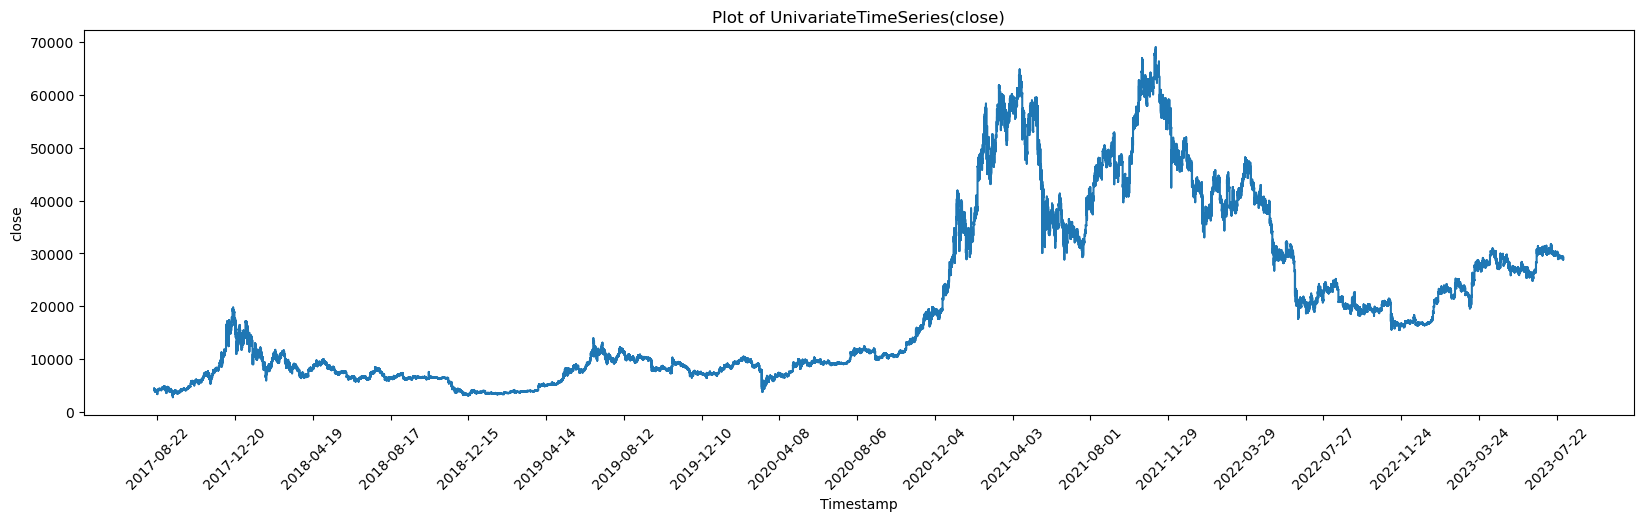

In [8]:
bitcoin_ts.plot(tick_skip=120)

### Get Descriptive Statistics of Raw Data

In [9]:
bitcoin_ts.get_statistics()

,close
count,3.126000e+06
mean,2.008946e+04
std,1.605896e+04
min,2.817000e+03
25%,7.624798e+03
50%,1.170000e+04
75%,2.989957e+04
max,6.900000e+04


In [10]:
bitcoin_ts.range_skewness_kurtosis()

{'Range': close    66183.0
 dtype: float64,
 'Skewness': close    1.029161
 dtype: float64,
 'Kurtosis': close   -0.056707
 dtype: float64}

### Check Stationarity of Raw Data

In [11]:
# both a taking a while
# bitcoin_ts.stationarity_test(bitcoin_df)

# from statsmodels.tsa.stattools import adfuller, bds

# adfuller(bitcoin_df)

- Stationarity test is taking a while. From looking at the graph, we can see that the time series is NOT stationary, so we can difference.

In [12]:
# bitcoin_series = bitcoin_ts.get_series()
# bitcoin_ts.independence_test(bitcoin_series)

- Independence test is taking a while as well. Assume that the data is dependent as there is correlation due to the time series being non-stationary.

### Difference

In [13]:
differenced_bitcoin_ts = bitcoin_ts.data_augment_with_differencing(1)

In [14]:
differenced_bitcoin_ts

UnivariateTimeSeries(Order-1 Difference of close)

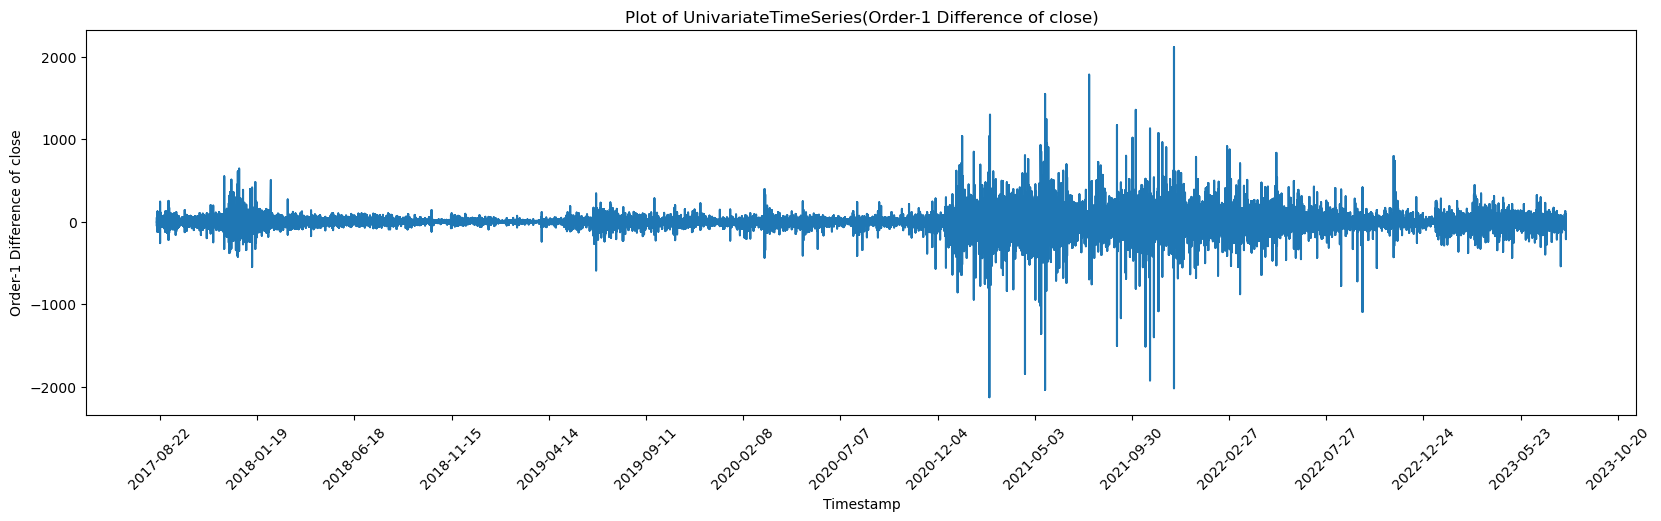

In [15]:
differenced_bitcoin_ts.plot(tick_skip=150)

- Data is differenced once. Will difference again to see plot and choose which is best as stationarity and independence test are taking a while on the raw data and assuming it'll take the same time on the differences as it's the same length. 

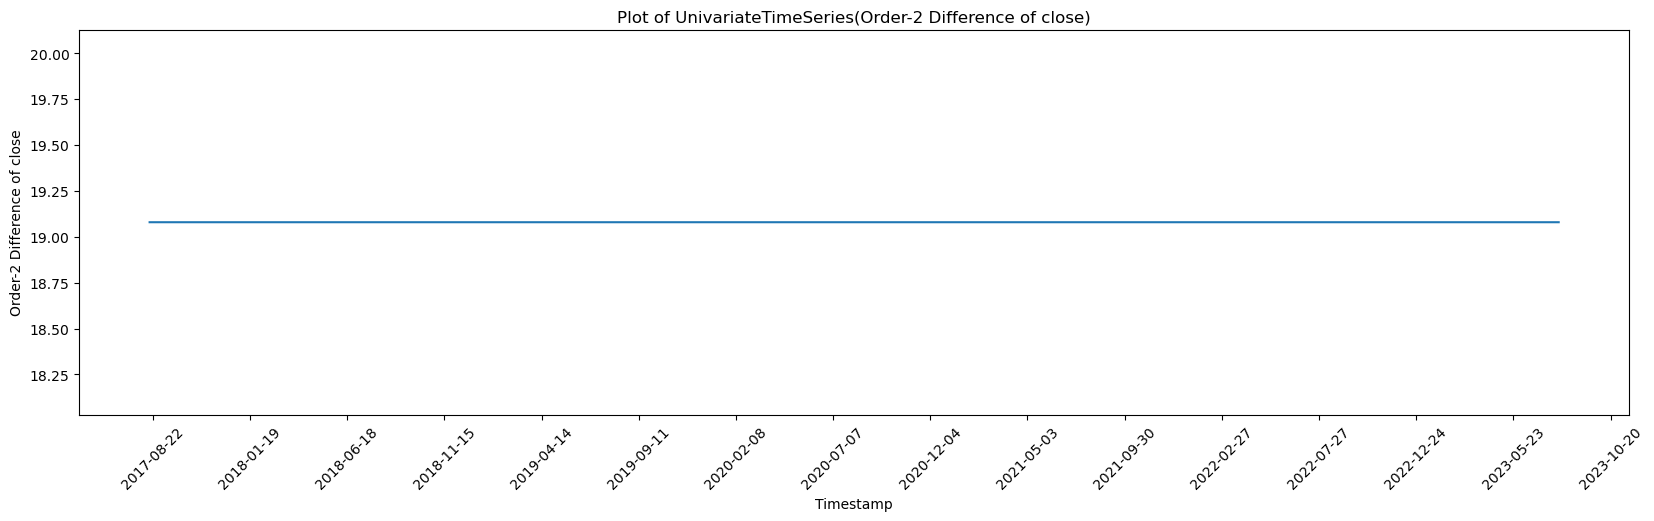

In [16]:
differenced_2_bitcoin_ts = bitcoin_ts.data_augment_with_differencing(2)
differenced_2_bitcoin_ts.plot(tick_skip=150)

- Too much differencing or code for 2nd diff and after is wrong? Will go with difference 1. 

### Get Descriptive Statistics of Differenced Data

In [17]:
differenced_bitcoin_ts.get_statistics()

,Order-1 Difference of close
count,3.125999e+06
mean,7.882603e-03
std,2.862586e+01
min,-2.129570e+03
25%,-5.180000e+00
50%,0.000000e+00
75%,5.160000e+00
max,2.115780e+03


In [18]:
differenced_bitcoin_ts.range_skewness_kurtosis()

{'Range': Order-1 Difference of close    4245.35
 dtype: float64,
 'Skewness': Order-1 Difference of close   -0.35713
 dtype: float64,
 'Kurtosis': Order-1 Difference of close    154.179352
 dtype: float64}

### Check Stationarity of Difference Data

In [19]:
# differenced_bitcoin_df = differenced_bitcoin_ts.get_as_df()
# differenced_bitcoin_ts.stationarity_test(differenced_bitcoin_df)

### Plot Autocorrelation and Partial Autocorrelation of Difference Data

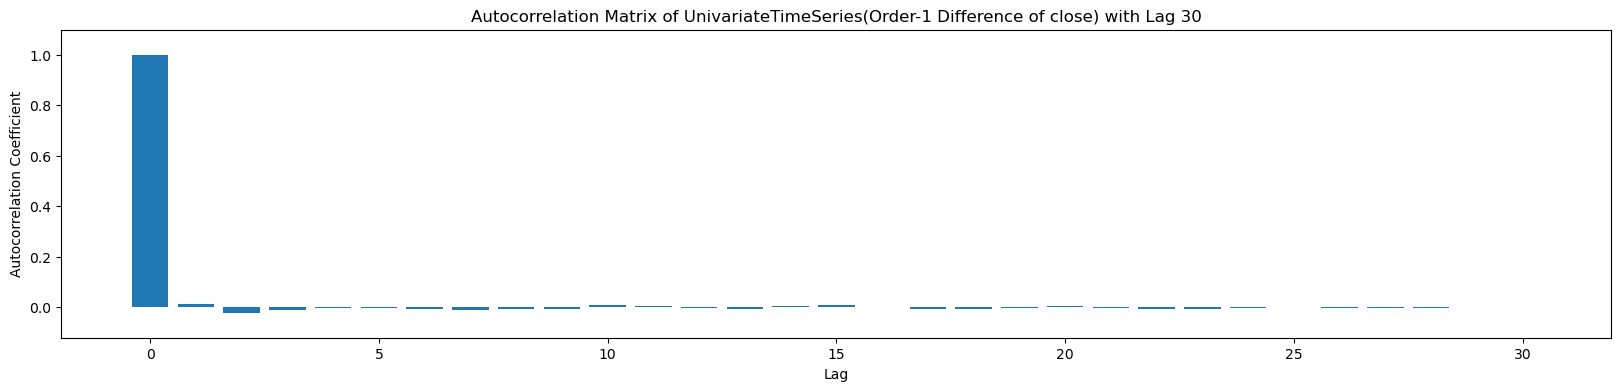

In [20]:
# differenced_bitcoin_ts.plot_autocorrelation(30)

- Exponentially dies out at lag 1, so no correlation between $ z_0 $  and $ z_1 $. With this, there doesn't exists any correlation between $ z_0 $ and the remaining $ z_{t - 1} $.

In [ ]:
# differenced_bitcoin_ts.plot_partial_autocorrelation(35)

- Exponentially dies out at lag 1, so no correlation between $ z_0 $  and $ z_1 $.

In [ ]:
# differenced_bitcoin_ts(differenced_bitcoin_ts.get_series())

### Initialize & Predict (RW) Model of Raw Data

#### Split Differenced Data

In [23]:
bitcoin_series = bitcoin_ts.get_series()
bitcoin_series

array([ 4261.48,  4261.48,  4280.56, ..., 28902.49, 28902.49, 28902.49])

In [31]:
diff_bitcoin_series = differenced_bitcoin_ts.get_series()
len(diff_bitcoin_series), diff_bitcoin_series

(3125999, array([  0.  ,  19.08, -19.08, ...,  -6.04,   0.  ,   0.  ]))

In [39]:
train_size = int(len(bitcoin_series) * .66)
train_size

2063160

In [48]:
train_uts = bitcoin_ts.get_slice(0, train_size, both_train_test=False)
test_uts = bitcoin_ts.get_slice(train_size, len(bitcoin_series), both_train_test=False)
train_uts, test_uts

0 2063160
2063160 3126000


(UnivariateTimeSeries(UnivariateTimeSeries(close)[0:2063160]),
 UnivariateTimeSeries(UnivariateTimeSeries(close)[2063160:3126000]))

In [50]:
train_df = train_uts.get_as_df()
train_df

,UnivariateTimeSeries(close)[0:2063160]
Timestamp,
2017-08-17,4261.48
2017-08-17,4261.48
2017-08-17,4280.56
2017-08-17,4261.48
2017-08-17,4261.48
...,...
2021-07-24,34304.97
2021-07-24,34308.98
2021-07-24,34298.04


In [51]:
test_df = test_uts.get_as_df()
test_df

,UnivariateTimeSeries(close)[2063160:3126000]
Timestamp,
2021-07-24,34199.99
2021-07-24,34202.66
2021-07-24,34215.36
2021-07-24,34246.87
2021-07-24,34234.41
...,...
2023-08-01,28907.41
2023-08-01,28908.53
2023-08-01,28902.49


In [54]:
rw_model_class = RandomWalk()

rw_predictions = rw_model_class.predict(train_df, test_df)

In [70]:
type(rw_predictions[0]), rw_predictions

(numpy.ndarray,
 [array([34232.]),
  array([34199.99]),
  array([34202.66]),
  array([34215.36]),
  array([34246.87]),
  array([34234.41]),
  array([34250.06]),
  array([34262.94]),
  array([34250.]),
  array([34236.79]),
  array([34266.56]),
  array([34252.88]),
  array([34270.]),
  array([34292.89]),
  array([34305.02]),
  array([34307.16]),
  array([34310.38]),
  array([34300.02]),
  array([34288.55]),
  array([34280.01]),
  array([34315.05]),
  array([34352.31]),
  array([34343.46]),
  array([34330.91]),
  array([34332.06]),
  array([34350.01]),
  array([34370.8]),
  array([34380.95]),
  array([34392.51]),
  array([34394.83]),
  array([34394.14]),
  array([34399.8]),
  array([34378.56]),
  array([34357.07]),
  array([34352.88]),
  array([34362.81]),
  array([34388.53]),
  array([34390.28]),
  array([34374.84]),
  array([34331.64]),
  array([34325.]),
  array([34329.99]),
  array([34328.18]),
  array([34328.22]),
  array([34328.77]),
  array([34329.97]),
  array([34303.97]),
  array

In [74]:
rw_mse_gsts = EvaluationMetric.eval_mse(test_df, rw_predictions, per_element=False)
rw_rmse_gsts = EvaluationMetric.eval_rmse(test_df, rw_predictions, per_element=False)
rw_mse_gsts, rw_rmse_gsts

Test MSE: 963.112
Test RMSE: 31.034


(None, None)

- Both `MSE` and `RMSE` for the raw TS are high. Why?

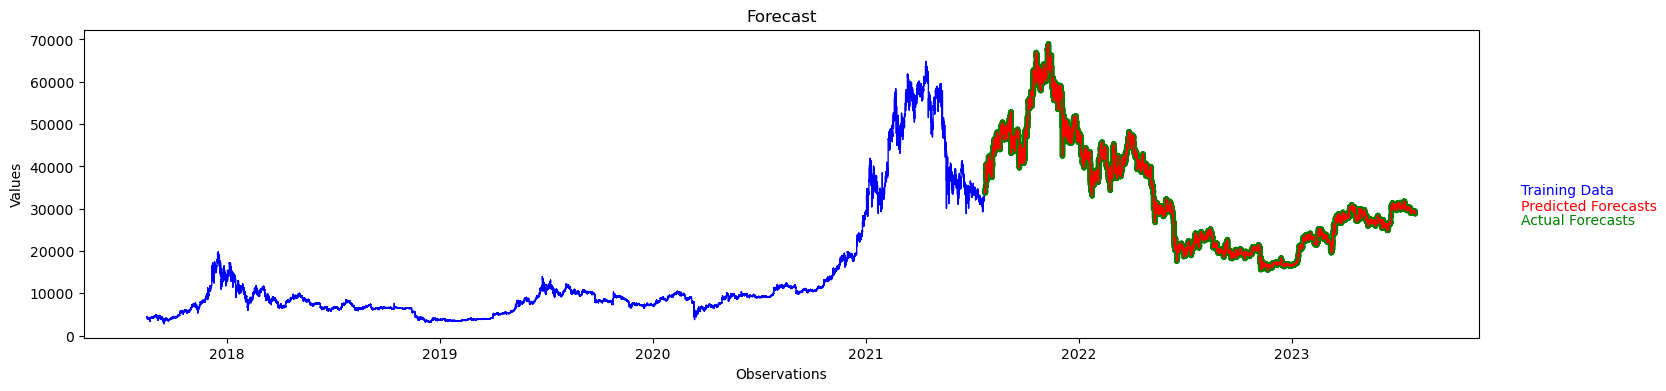

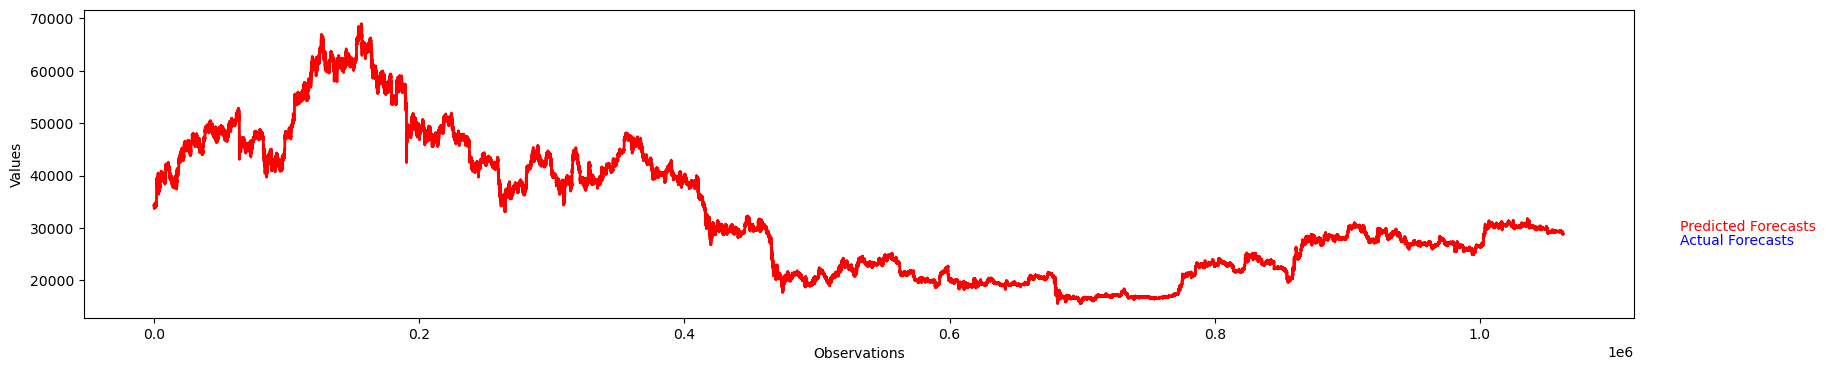

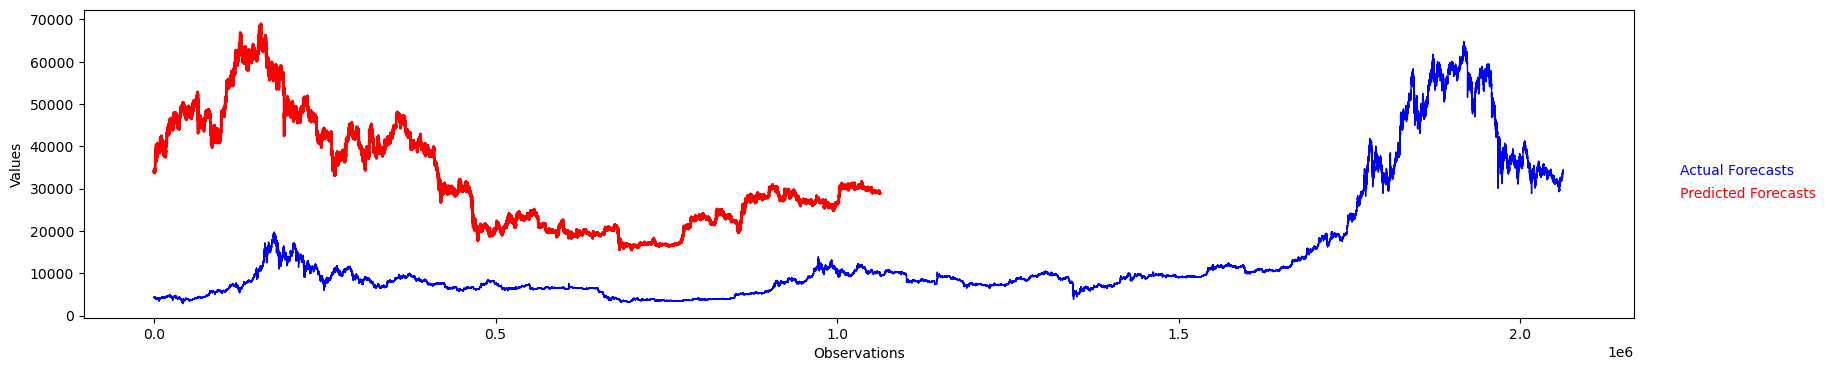

In [80]:
EvaluationMetric.plot_forecast(train_df, test_df, rw_predictions, per_element=False)
# EvaluationMetric.plot_forecast_only(test_df, rw_predictions, per_element=True)
EvaluationMetric.plot_predictions(test_df, rw_predictions, lag=1)
EvaluationMetric.plot_predictions(train_df, rw_predictions, lag=1)

### Initialize Autoregressive AR(p) Model
- How to determine the proper lag value? Look at the Partial ACor plot. Being that we're out of the blue area at lag 3, we'll set our lag to be 3. 
    - Why Partial ACor plot and not ACor plot?
    - What if we take lags from ACor plot anyway? Say lags 5, 10, and 15 because they all have the most correlation (postive and negative) for their clusters, respectfully.
- How to understand the model summary?

### Predict + Plot Actual Forecasts vs Predicted Forecasts for Raw Data

### Follow-up
- What can we determine from this?
    - `RW` on raw TS outperforms both (1) `RW` and `AR` on differenced TS.
- Can we do better? or What might be wrong?
    - Size of days_to_forecast for `AR` is 339. When set to 340, get an error. Could this be why `RW` outperforms `AR`?